In [20]:
import cv2
import time
import os
import PIL.Image

# Data

In [21]:
image_dir = 'Dataset'

# Enumerate all the images

In [22]:
classes = []
for f in os.listdir(image_dir):
    if not f.startswith('.'):
        classes.append(f)
print(classes)

['with_mask', 'without_mask']


In [57]:
count = 0
all_shapes = {}
for c in classes:
    print('Class: {cls}'.format(cls=c))
    for f in os.listdir(os.path.join(image_dir, c)):
        if f.startswith('.'):
            continue

        path = os.path.join(image_dir, c, f)
        img = cv2.imread(path)
        shape = img.shape
        
        if shape in all_shapes:
            all_shapes[shape] += 1
        else:
            all_shapes[shape] = 1
        count += 1
        if (count%1000) == 0:
            print('Processed {} images'.format(count))
print('Found {} images'.format(count))
print('Found {} shapes'.format(len(all_shapes)))

Class: with_mask
Processed 1000 images
Processed 2000 images
Processed 3000 images
Class: without_mask
Processed 4000 images
Processed 5000 images
Processed 6000 images
Processed 7000 images
Found 7553 images
Found 2692 shapes


In [58]:
import matplotlib

In [126]:
width = []
height = []
aspect = []
data = []

for k, v in all_shapes.items():
    (h, w, c) = k
    width.append(w)
    height.append(h)
    for x in range(v):
        aspect.append(float(w)/h)
    data.append((k, v))
data = sorted(data, key=lambda x: -x[1])

for x in range(20):
    print('{}: {}'.format(data[x][0], data[x][1]))
    

(225, 225, 3): 664
(428, 320, 3): 381
(275, 183, 3): 255
(100, 100, 3): 207
(183, 275, 3): 181
(259, 194, 3): 159
(194, 259, 3): 157
(168, 300, 3): 122
(251, 201, 3): 101
(433, 320, 3): 89
(168, 299, 3): 46
(433, 327, 3): 45
(246, 205, 3): 42
(190, 265, 3): 41
(1000, 1000, 3): 30
(259, 195, 3): 29
(224, 224, 3): 27
(274, 184, 3): 27
(159, 318, 3): 25
(224, 225, 3): 24


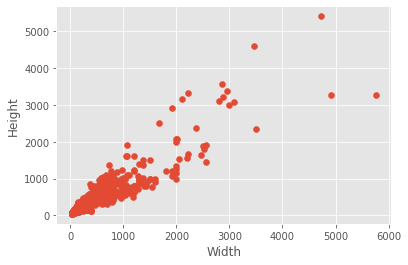

In [77]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.scatter(width, height)
plt.xlabel('Width') 
plt.ylabel('Height') 
# plt.legend() 
plt.show() 

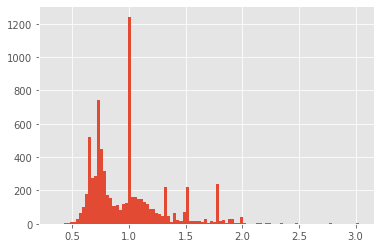

In [135]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.hist(aspect, 100)
plt.show() 